In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
dataset=(r'Z:\ML\learningml\archive (12)\Books_Data_Clean.csv')

In [33]:
df=pd.read_csv(dataset)

In [34]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [35]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [36]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [37]:
df=df[df["Publishing Year"]>1900]
''' df["Publishing Year"] > 1900:
This creates a Boolean Series, returning True for rows where the "Publishing Year" is greater than 1900, and False otherwise.
df[...]:
This filters the DataFrame to include only the rows where the condition inside the brackets is True.'''

' df["Publishing Year"] > 1900:\nThis creates a Boolean Series, returning True for rows where the "Publishing Year" is greater than 1900, and False otherwise.\ndf[...]:\nThis filters the DataFrame to include only the rows where the condition inside the brackets is True.'

In [38]:
df.isna().sum().sort_values(ascending=False)


language_code          49
Book Name              21
index                   0
Publishing Year         0
Author                  0
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [39]:
df.dropna(subset=["Book Name"], inplace=True)


In [40]:
df.isna().sum().sort_values(ascending=False)


language_code          47
Publishing Year         0
index                   0
Book Name               0
Author                  0
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.nunique()
#df.nunique() will give you a count of unique values for every column in your DataFrame.

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

Text(0.5, 1.0, 'Distribution of Publish Year')

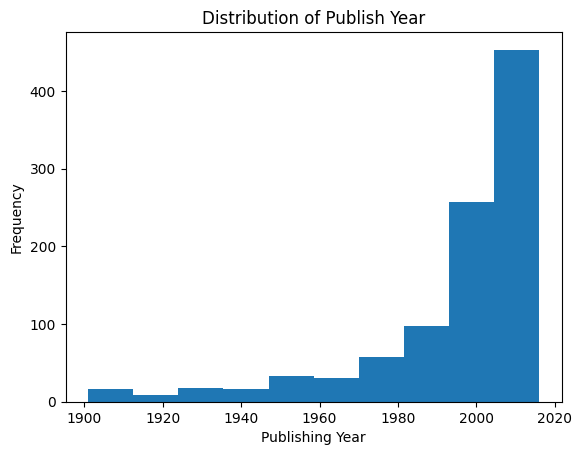

In [43]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publish Year")

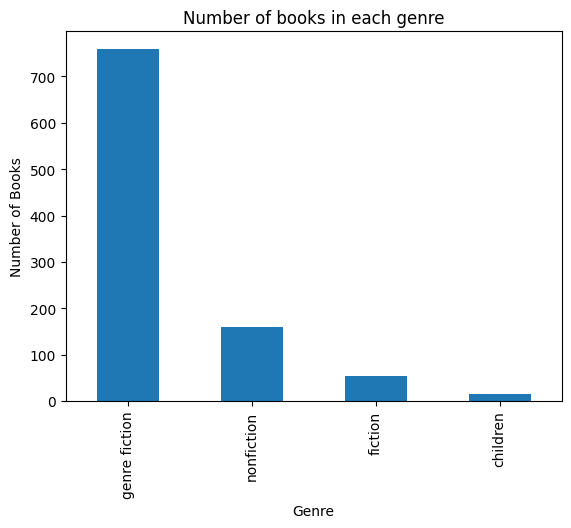

In [44]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of books in each genre")
plt.show()

In [45]:
df.groupby("Author")["Book_average_rating"].mean().head(10)


Author
A.A. Milne, Ernest H. Shepard               4.36
A.S.A. Harrison                             3.30
Abbi Glines                                 4.21
Adam Johnson                                4.06
Adam Mansbach, Ricardo CortÃ©s              4.26
Agatha Christie                             4.13
Agatha Christie, Î¡Î¿Î¶Î¯Ï„Î± Î£ÏŽÎºÎ¿Ï…    3.98
Alan Bradley                                3.81
Alan Brennert                               4.15
Alan Moore, Brian Bolland, Tim Sale         4.36
Name: Book_average_rating, dtype: float64

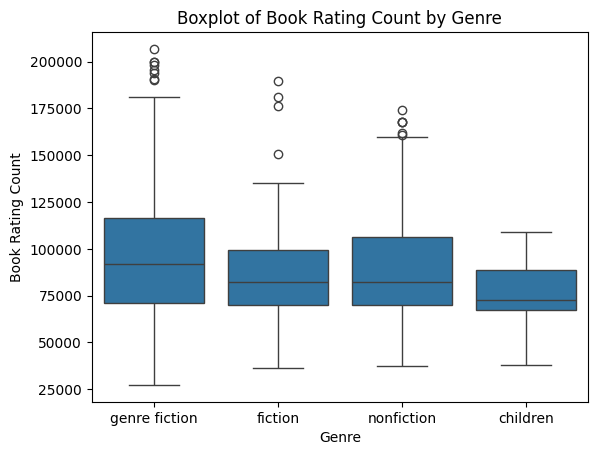

In [52]:
sns.boxplot(x="genre", y="Book_ratings_count",data=df)
plt.xlabel("Genre")
plt.ylabel("Book Rating Count")
plt.title("Boxplot of Book Rating Count by Genre")
plt.show()

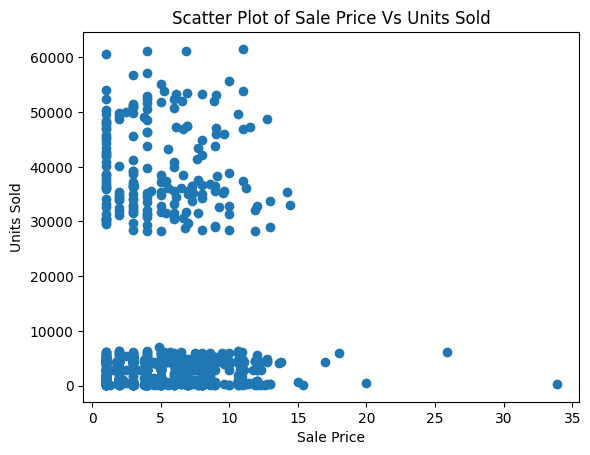

In [54]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price Vs Units Sold")
plt.show()


In [56]:
language_counts=df["language_code"].value_counts().sort_values(ascending=True)
language_counts

language_code
nl         1
spa        2
ara        2
fre        4
en-CA      7
en-GB     29
en-US    226
eng      670
Name: count, dtype: int64

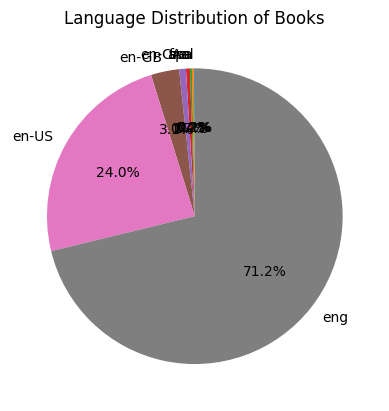

In [59]:
plt.pie(language_counts,labels=language_counts.index,startangle=90,autopct="%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()

In [63]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [66]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [67]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=True)

Author_Rating
Excellent        83804.800595
Novice           87318.464286
Famous           98295.250000
Intermediate    101400.272569
Name: Book_ratings_count, dtype: float64

In [69]:
df.groupby("language_code").size().sort_values(ascending=False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [75]:
df.groupby("Author_Rating")["Book_ratings_count"].max()

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64

Text(0.5, 1.0, 'Scatter plot  of Book Average vs Book Ratings count')

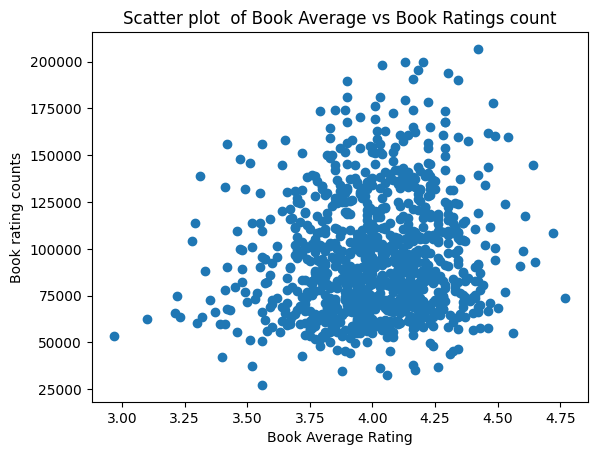

In [76]:
plt.scatter(df["Book_average_rating"],df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book rating counts")
plt.title("Scatter plot  of Book Average vs Book Ratings count")

In [ ]:
total_gross_sales_by_author=df.groupby("Author")["gross sales"].sum().sort_values(ascending=False)



Author
Harper Lee              47795.00
Stephen King            43322.65
David Sedaris           42323.41
Charlaine Harris        39453.08
Laini Taylor            38278.41
                          ...   
Nathaniel Philbrick       107.91
Steve Martin              107.91
Walter M. Miller Jr.      106.92
Michael Shaara            105.93
Blake Crouch              105.93
Name: gross sales, Length: 669, dtype: float64

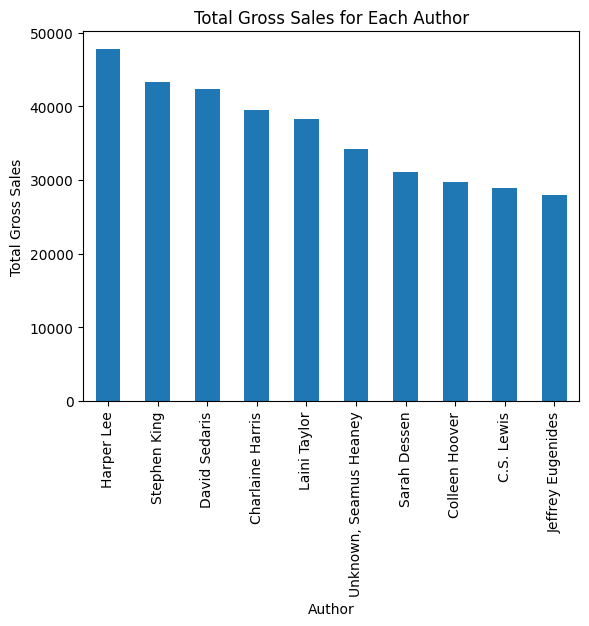

In [80]:
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for Each Author")
plt.show()

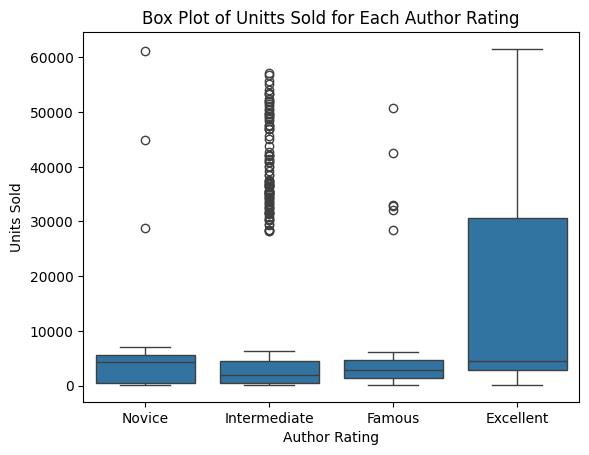

In [81]:
sns.boxplot(x="Author_Rating",y="units sold",data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Box Plot of Unitts Sold for Each Author Rating")
plt.show()

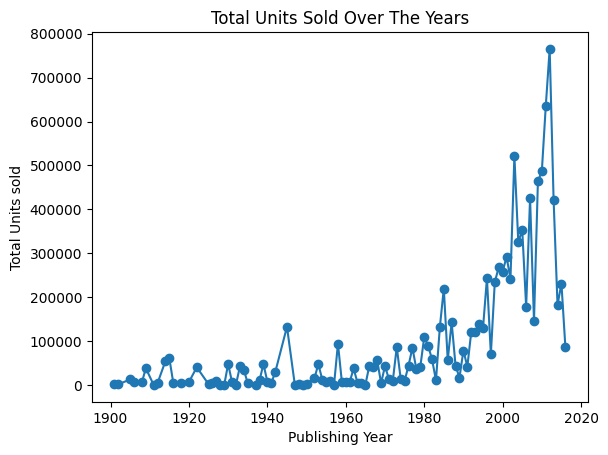

In [85]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line",marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units sold")
plt.title("Total Units Sold Over The Years")
plt.show()